In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.api import OLS

from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from pandas.plotting import scatter_matrix

import seaborn as sns

import csv

In [2]:
production='final.xlsx'
data = pd.read_excel(production)
data

,Indian State,Year,Production,Rainfall,Temperature
0,Andhra Pradesh,2005,15739.0,2288.00,27.82
1,Assam,2005,883.9,1234.15,23.60
2,Bihar,2005,4111.7,907.80,25.82
3,Gujarat,2005,14570.0,1948.00,26.85
4,Haryana,2005,8060.0,519.50,24.80
...,...,...,...,...,...
210,Odisha,2020,505.0,1536.90,25.86
211,Punjab,2020,7302.0,585.50,24.54
212,Tamil Nadu,2020,14119.1,988.40,28.07
213,Telangana,2020,2012.9,1350.30,21.17


In [3]:
y = np.array(data['Production'])
X = data.drop(['Indian State','Production','Year'],axis=1)
#feature_list=list(X.columns)
#X=np.array(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [4]:
X_test.shape

(54, 2)

In [5]:
y_train.shape

(161,)

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=2000,random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

Text(0, 0.5, 'Predictions ')

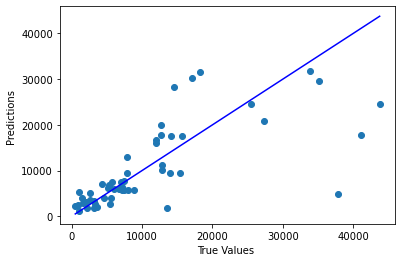

In [8]:
plt.scatter(y_test, y_pred)
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values ')
plt.ylabel('Predictions ')

In [9]:
m=y_test.mean()
m

11005.899999999998

In [10]:
p=y_pred.mean()
p

10317.182722222251

In [11]:
err=(m-p)/m*100
err="{:.2f}".format(err)
print('The error is '+str(err)+'%.')

The error is 6.26%.


In [12]:
err=[err]
import csv

header = ['RF']

with open('err.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)
    
    writer.writerow(header)
    writer.writerow(err)